In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from pylab import *
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings

warnings.simplefilter(action='ignore')

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/bashirm/opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/bashirm/opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [121]:
!pip install catboost

In [122]:
from catboost import CatBoostClassifier

In [3]:
dataset = pd.read_csv('packet_data_200.csv')

In [4]:
# head
print(dataset.head(5))

   win-size  packet-len  begin-seq  end-seq               label(IP address)
0   507.705     348.425    139.370    19.91   192.5.87.126--129.114.109.142
1   487.795     298.650    139.370    19.91   192.5.87.126--129.114.109.142
2   467.885     318.560    129.415    19.91   192.5.87.126--129.114.109.142
3   457.930     308.605    149.325    19.91   192.5.87.126--129.114.109.142
4   497.750     358.380    139.370    19.91   192.5.87.126--129.114.109.142


In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
win-size,200.0,558.265150,83.962170,418.065,495.2275,547.5250,627.165,786.445
packet-len,200.0,310.435425,43.371494,199.100,288.6500,308.5600,338.470,438.020
begin-seq,200.0,314.566750,184.084155,89.550,139.3700,243.8975,487.795,686.895
end-seq,200.0,93.781850,79.469558,0.045,19.9100,79.6400,159.280,248.875


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   win-size           200 non-null    float64
 1   packet-len         200 non-null    float64
 2   begin-seq          200 non-null    float64
 3   end-seq            200 non-null    float64
 4   label(IP address)  200 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [7]:
target_labels = dataset['label(IP address)'].unique()
target_labels

array([' 192.5.87.126--129.114.109.142', ' 192.5.87.126--129.114.109.144',
       ' 192.5.87.157--129.114.109.142', '192.5.87.157--129.114.109.144'],
      dtype=object)

In [8]:
num_cols = list(dataset.select_dtypes(exclude = object).columns)
num_cols

['win-size', 'packet-len', 'begin-seq', 'end-seq']

In [9]:
# for col in num_cols:
#     ax = [None for i in range(2)]
#     # set 2 subplots and set ratio of plots 
#     f, (ax[0], ax[1]) = plt.subplots(2, sharex=True, 
#                                         gridspec_kw={"height_ratios": (.20, .80)
#                                         })   
#     g1 = sns.boxplot(col, ax=ax[0], data=dataset, color='olive') # boxplot
#     g1.set(xlabel=None) # remove x axis label for boxplot
#     g2 = sns.kdeplot(dataset[col], ax=ax[1], shade=True, color='gold', alpha=0.6, 
#                      zorder=3, edgecolor='black') # distribution plot
#     plt.xlabel(col, size=12) 
#     plt.ylabel('Density', size=12)
#     plt.tick_params(labelsize=12)
#     plt.title(col.upper()+' Distribution', size=15)
#     plt.tight_layout()
#     plt.show()

In [10]:
dataset['label(IP address)'] = pd.factorize(dataset['label(IP address)'])[0]
dataset.head()

,win-size,packet-len,begin-seq,end-seq,label(IP address)
0,507.705,348.425,139.370,19.91,0
1,487.795,298.650,139.370,19.91,0
2,467.885,318.560,129.415,19.91,0
3,457.930,308.605,149.325,19.91,0
4,497.750,358.380,139.370,19.91,0


In [11]:
dataset['label(IP address)'].unique() 

array([0, 1, 2, 3])

<AxesSubplot:>

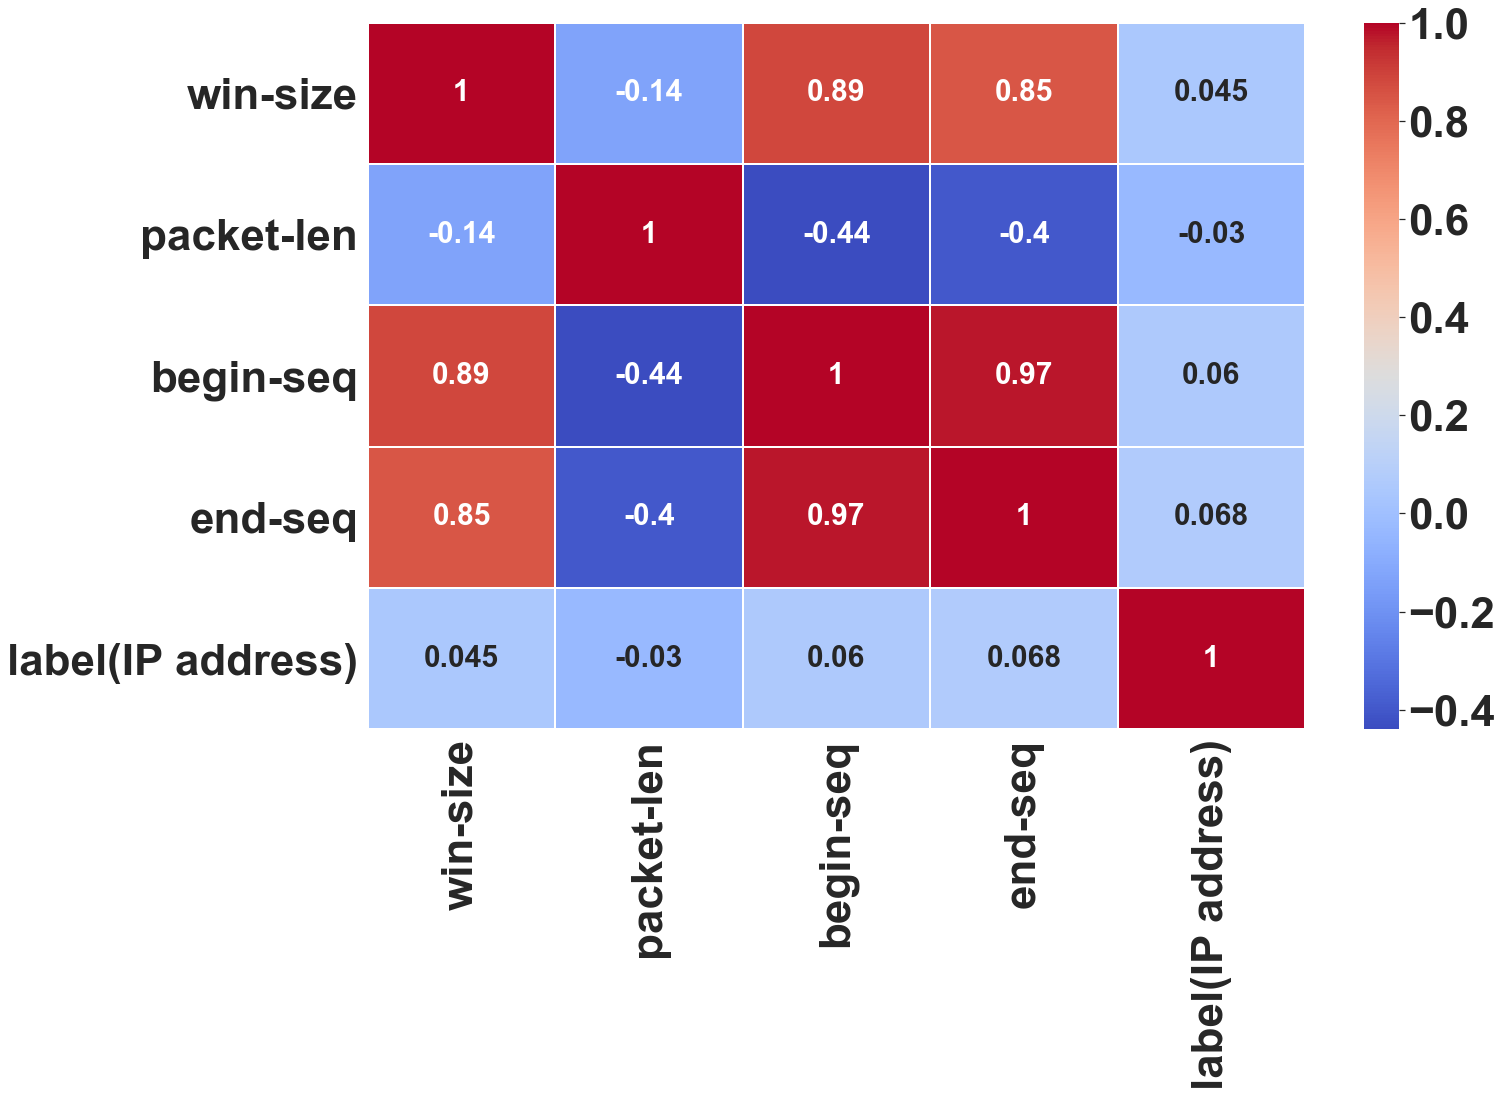

In [117]:
corr = dataset.corr().round(3)
plt.figure(figsize = (21,13))
sns.set(font_scale=4.0)
sns.heatmap((corr),cmap='coolwarm',annot=True, annot_kws={"size":30},linewidths=0.1,)
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
# plt.title("", fontsize=70)
# plt.savefig('test.png')

In [58]:
from collections import Counter
#import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import ( f1_score, classification_report, 
                             confusion_matrix, roc_auc_score,
                             roc_curve, auc, accuracy_score )

In [59]:
y = dataset['label(IP address)']
X = dataset.drop('label(IP address)', axis=1)
print(X.shape, y.shape)

(200, 4) (200,)


In [97]:
def fit_predict(model, X, y, K, plot=True):
    ''' Description
        -----------
        Train model specified on dataset using StratifiedKFold
        and resampling (optional)
        
        Parameters
        ----------
        model : sklearn model
            Machine learning model to be trained 
        X : pandas dataframe
          Training dataset
        y : pandas series 
          Target column, must have same number of observations with X
        K : int
          Number of folds for StratifiedKFold
        plot : bool, optional
          Show roc-auc training plot (optional)
          
        Returns
        --------
        average confusion matrix, classification report, model name
        and roc curve
    '''
    
    # set initial scores
    scores = 0
    auc_scores = 0
    acc_scores = 0 
    # set empty list to store predictions on test set
    test_oofs = []
    # get model name
    model_name = type(model).__name__
    # set a zero matrix of shape (4,4) for confusion matrix
    matrix = np.zeros((4, 4))
    # set up empty lists to extend true and predicted values
    originalclass, predictedclass = [], []
    train_accuracies, test_accuracies = [0.5], [0.5]

    # initiate StratifiedKFold
    kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=1)

    for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # training
        if model_name in ['LogisticRegression', 'DecisionTreeClassifier',
                          'RandomForestClassifier', 'KNeighborsClassifier', 'LinearDiscriminantAnalysis', 'GaussianNB', ]:
            model.fit(X_train, y_train)
        else:
            model.fit(X_train, y_train,
                      early_stopping_rounds=300,
                      eval_set=[(X_test, y_test)],
                      verbose=False)
            
        # predicting on test set
        pred = model.predict(X_test)
        prob = model.predict_proba(X_test)
        # predict on train test
        train_pred = model.predict(X_train)
        # append y_test and pred list to original class and predicted class
        # lists respectivelyron
        originalclass.extend(y_test)
        predictedclass.extend(pred)
        # get F1-score, roc_auc_score and accuracy
        score = f1_score(y_test, pred, average='macro')
        roc = roc_auc_score(y_test, prob, multi_class='ovr') 
        acc = accuracy_score(y_test, pred)
        train_acc = accuracy_score(y_train, train_pred)  
        # append roc-auc for train and test
        train_accuracies.append(train_acc) 
        test_accuracies.append(roc)
        # take mean of scores
        scores += score/K
        auc_scores += roc/K
        acc_scores += acc/K 
        test_oofs.append(pred)
        # sum confusion matrix of each fold to matrix
        matrix += confusion_matrix(y_test, pred)

        if i % 4 == 0:
            print('Fold {} Accuracy score: {}'.format(i+1, acc))
            print('Fold {} F1-score: {}'.format(i+1, score))
            print('Fold {} ROC-AUC score: {}'.format(i+1, roc))
            print('='*45) 

    print() 
    print('Avg Accuracy score: {:.4f} '.format(acc_scores))
    print('Avg F1 score: {:.4f} '.format(scores))
    print('Avg ROC-AUC score: {:.4f} '.format(auc_scores))
        
    if plot:
        # plot train and test roc-auc
        plt.figure(figsize=(10, 5))
        plt.plot(train_accuracies, label="train accuracy")
        plt.plot(test_accuracies, label="test accuracy")
        plt.legend(loc="lower right", prop={'size': 12})
        plt.tick_params(labelsize=12)
        plt.xticks(range(0, K+1, 5))
        plt.xlabel("fold", size=12)
        plt.ylabel("accuracy", size=12)
        plt.show() 

    # get classification report
    report = classification_report(originalclass, predictedclass)

    # append results for comaprison
    models.append(model_name)  # model name
    F1score.append(scores)  # f1-score
    aucroc.append(auc_scores)  # roc_auc_score
    accuracy.append(acc_scores) # accuracy style

    return matrix, report,  model

In [98]:
def importance_plot(model, X):
    ''' Description: Creates feature importance plot for a trained model
        Arguements: model - trained model on dataset
                    X - training dataset
                    sample - sampling method
    '''
    model_name = type(model).__name__
    if model_name in ['LogisticRegression']:
        feat_imp = pd.DataFrame(sorted(zip(model.coef_[0], X.columns)),
                                columns=['Value', 'Feature'])
    else:
        feat_imp = pd.DataFrame(sorted(zip(model.feature_importances_, X.columns)),
                                columns=['Value', 'Feature'])
    plt.figure(figsize=(20, 15))
    imp_data = feat_imp.sort_values(by="Value", ascending=False)
    sns.barplot(x="Value", y="Feature", data=imp_data.iloc[:50])
    plt.tick_params(labelsize=12)
    plt.ylabel('Feature Importance Score', size=12)
    plt.xlabel('Value', size=12)
    plt.title(model_name  + ' Feature Importance Plot', size=15)
    plt.show()

In [99]:
def heat_map(model, matrix, labels):
    ''' Description: Creates confusion matrix heatmap for a model
        Arguements: model - trained model
                    matrix - model confusion matrix
                    labels - list containing class labels 
    '''
    sns.heatmap(matrix, xticklabels=labels, yticklabels=labels,
                annot=True, fmt='g')
    plt.tick_params(labelsize=12)
    plt.xlabel('Predicted label', size=12)
    plt.ylabel('True label', size=12)
    plt.title(type(model).__name__ + ' Confusion Matrix Heatmap', size=15)
    plt.show()

In [100]:
# store results for result comparison
models = []
F1score = []
aucroc = [] 
accuracy = [] 

Fold 1 Accuracy score: 0.75
Fold 1 F1-score: 0.6666666666666666
Fold 1 ROC-AUC score: 1.0
Fold 5 Accuracy score: 0.875
Fold 5 F1-score: 0.8666666666666666
Fold 5 ROC-AUC score: 0.9166666666666667
Fold 9 Accuracy score: 1.0
Fold 9 F1-score: 1.0
Fold 9 ROC-AUC score: 1.0
Fold 13 Accuracy score: 0.625
Fold 13 F1-score: 0.6166666666666667
Fold 13 ROC-AUC score: 0.9583333333333335
Fold 17 Accuracy score: 0.875
Fold 17 F1-score: 0.8666666666666667
Fold 17 ROC-AUC score: 1.0
Fold 21 Accuracy score: 0.75
Fold 21 F1-score: 0.7333333333333334
Fold 21 ROC-AUC score: 1.0
Fold 25 Accuracy score: 0.875
Fold 25 F1-score: 0.8666666666666666
Fold 25 ROC-AUC score: 0.9583333333333335

Avg Accuracy score: 0.7800 
Avg F1 score: 0.7560 
Avg ROC-AUC score: 0.9400 


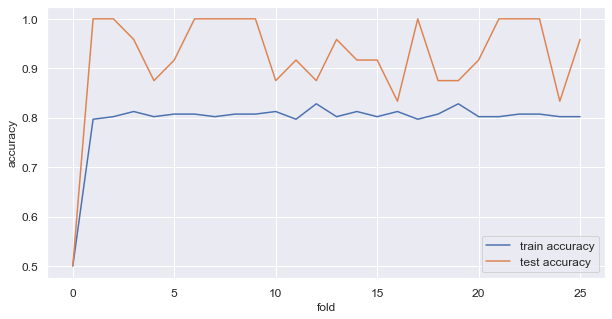

In [101]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_matrix, lr_report, lr_1 = fit_predict(lr, X, y, 25)

In [102]:
print(lr_report)

              precision    recall  f1-score   support

           0       0.65      0.56      0.60        50
           1       0.94      0.92      0.93        50
           2       0.92      0.94      0.93        50
           3       0.61      0.70      0.65        50

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



Fold 1 Accuracy score: 0.875
Fold 1 F1-score: 0.8666666666666667
Fold 1 ROC-AUC score: 0.9166666666666667
Fold 5 Accuracy score: 0.75
Fold 5 F1-score: 0.7333333333333334
Fold 5 ROC-AUC score: 0.8333333333333335
Fold 9 Accuracy score: 1.0
Fold 9 F1-score: 1.0
Fold 9 ROC-AUC score: 1.0
Fold 13 Accuracy score: 0.75
Fold 13 F1-score: 0.6666666666666666
Fold 13 ROC-AUC score: 0.8333333333333334
Fold 17 Accuracy score: 0.875
Fold 17 F1-score: 0.8666666666666666
Fold 17 ROC-AUC score: 0.9166666666666667
Fold 21 Accuracy score: 1.0
Fold 21 F1-score: 1.0
Fold 21 ROC-AUC score: 1.0
Fold 25 Accuracy score: 1.0
Fold 25 F1-score: 1.0
Fold 25 ROC-AUC score: 1.0

Avg Accuracy score: 0.8950 
Avg F1 score: 0.8813 
Avg ROC-AUC score: 0.9300 


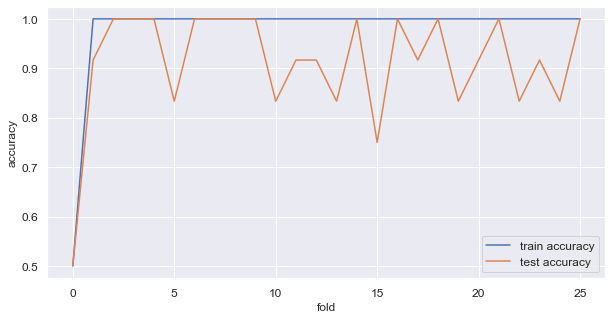

In [103]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree_matrix, dtree_report, dtree_1 = fit_predict(dtree, X, y, 25) 

In [104]:
print(dtree_report)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        50
           1       0.94      0.92      0.93        50
           2       0.92      0.94      0.93        50
           3       0.85      0.88      0.86        50

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200



Fold 1 Accuracy score: 0.875
Fold 1 F1-score: 0.8666666666666667
Fold 1 ROC-AUC score: 1.0
Fold 5 Accuracy score: 0.75
Fold 5 F1-score: 0.7333333333333333
Fold 5 ROC-AUC score: 0.9166666666666667
Fold 9 Accuracy score: 1.0
Fold 9 F1-score: 1.0
Fold 9 ROC-AUC score: 1.0
Fold 13 Accuracy score: 1.0
Fold 13 F1-score: 1.0
Fold 13 ROC-AUC score: 1.0
Fold 17 Accuracy score: 1.0
Fold 17 F1-score: 1.0
Fold 17 ROC-AUC score: 1.0
Fold 21 Accuracy score: 0.875
Fold 21 F1-score: 0.8666666666666667
Fold 21 ROC-AUC score: 1.0
Fold 25 Accuracy score: 1.0
Fold 25 F1-score: 1.0
Fold 25 ROC-AUC score: 1.0

Avg Accuracy score: 0.9250 
Avg F1 score: 0.9180 
Avg ROC-AUC score: 0.9933 


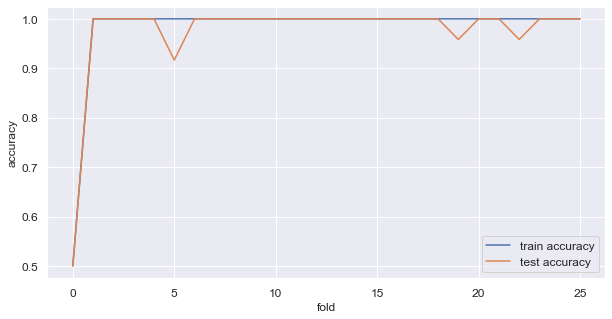

In [105]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_matrix, rf_report, rf_1 = fit_predict(rf, X, y, 25)
#plt.figure(figsize=(40,25))

In [106]:
print(rf_report)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50
           3       0.94      0.88      0.91        50

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



Fold 1 Accuracy score: 0.875
Fold 1 F1-score: 0.8666666666666667
Fold 1 ROC-AUC score: 1.0
Fold 5 Accuracy score: 0.75
Fold 5 F1-score: 0.7333333333333333
Fold 5 ROC-AUC score: 0.9166666666666667
Fold 9 Accuracy score: 1.0
Fold 9 F1-score: 1.0
Fold 9 ROC-AUC score: 1.0
Fold 13 Accuracy score: 0.875
Fold 13 F1-score: 0.8666666666666666
Fold 13 ROC-AUC score: 1.0
Fold 17 Accuracy score: 1.0
Fold 17 F1-score: 1.0
Fold 17 ROC-AUC score: 1.0
Fold 21 Accuracy score: 0.875
Fold 21 F1-score: 0.8666666666666667
Fold 21 ROC-AUC score: 1.0
Fold 25 Accuracy score: 1.0
Fold 25 F1-score: 1.0
Fold 25 ROC-AUC score: 1.0

Avg Accuracy score: 0.9250 
Avg F1 score: 0.9180 
Avg ROC-AUC score: 0.9942 


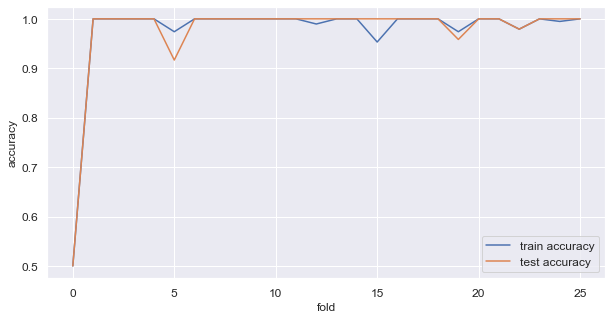

In [107]:
import catboost as cb

cb_ = cb.CatBoostClassifier()  
cb_matrix, cb_report, cb_1 = fit_predict(cb_, X, y, 25) 

In [108]:
print(cb_report)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50
           3       0.94      0.88      0.91        50

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



In [109]:
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression()
# lr_matrix, lr_report, lr_1 = fit_predict(lr, X, y, 25)

Fold 1 Accuracy score: 0.625
Fold 1 F1-score: 0.6
Fold 1 ROC-AUC score: 0.8958333333333335
Fold 5 Accuracy score: 0.75
Fold 5 F1-score: 0.75
Fold 5 ROC-AUC score: 0.9166666666666667
Fold 9 Accuracy score: 0.75
Fold 9 F1-score: 0.6666666666666666
Fold 9 ROC-AUC score: 0.9166666666666667
Fold 13 Accuracy score: 0.625
Fold 13 F1-score: 0.6
Fold 13 ROC-AUC score: 0.8125
Fold 17 Accuracy score: 0.625
Fold 17 F1-score: 0.6
Fold 17 ROC-AUC score: 0.8541666666666667
Fold 21 Accuracy score: 0.875
Fold 21 F1-score: 0.8666666666666667
Fold 21 ROC-AUC score: 0.9791666666666667
Fold 25 Accuracy score: 0.625
Fold 25 F1-score: 0.6
Fold 25 ROC-AUC score: 0.8333333333333335

Avg Accuracy score: 0.7100 
Avg F1 score: 0.6820 
Avg ROC-AUC score: 0.9017 


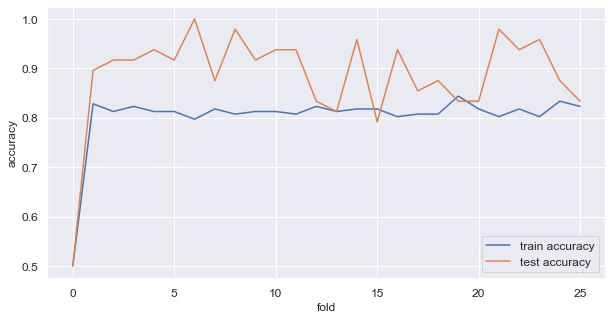

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_matrix, knn_report, knn_1 = fit_predict(knn, X, y, 25)

Fold 1 Accuracy score: 0.875
Fold 1 F1-score: 0.8666666666666667
Fold 1 ROC-AUC score: 0.9166666666666667
Fold 5 Accuracy score: 0.75
Fold 5 F1-score: 0.7333333333333333
Fold 5 ROC-AUC score: 0.8750000000000001
Fold 9 Accuracy score: 1.0
Fold 9 F1-score: 1.0
Fold 9 ROC-AUC score: 1.0
Fold 13 Accuracy score: 0.75
Fold 13 F1-score: 0.75
Fold 13 ROC-AUC score: 0.9166666666666667
Fold 17 Accuracy score: 1.0
Fold 17 F1-score: 1.0
Fold 17 ROC-AUC score: 1.0
Fold 21 Accuracy score: 0.75
Fold 21 F1-score: 0.7333333333333334
Fold 21 ROC-AUC score: 1.0
Fold 25 Accuracy score: 0.75
Fold 25 F1-score: 0.6666666666666666
Fold 25 ROC-AUC score: 0.9166666666666667

Avg Accuracy score: 0.8000 
Avg F1 score: 0.7807 
Avg ROC-AUC score: 0.9367 


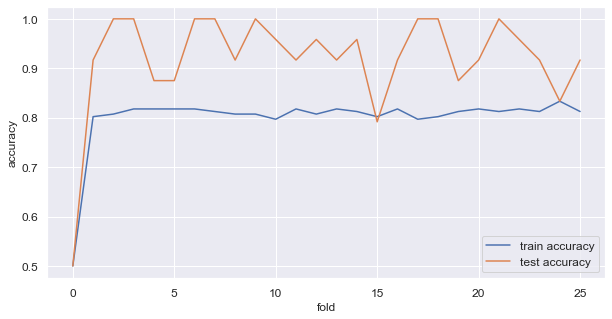

In [111]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_matrix, gnb_report, gnb_1 = fit_predict(gnb, X, y, 25)

Fold 1 Accuracy score: 0.625
Fold 1 F1-score: 0.6
Fold 1 ROC-AUC score: 0.8333333333333335
Fold 5 Accuracy score: 0.875
Fold 5 F1-score: 0.8666666666666666
Fold 5 ROC-AUC score: 0.9166666666666667
Fold 9 Accuracy score: 1.0
Fold 9 F1-score: 1.0
Fold 9 ROC-AUC score: 1.0
Fold 13 Accuracy score: 0.875
Fold 13 F1-score: 0.8666666666666667
Fold 13 ROC-AUC score: 0.9583333333333335
Fold 17 Accuracy score: 1.0
Fold 17 F1-score: 1.0
Fold 17 ROC-AUC score: 1.0
Fold 21 Accuracy score: 0.75
Fold 21 F1-score: 0.7333333333333334
Fold 21 ROC-AUC score: 1.0
Fold 25 Accuracy score: 0.875
Fold 25 F1-score: 0.8666666666666666
Fold 25 ROC-AUC score: 1.0

Avg Accuracy score: 0.7750 
Avg F1 score: 0.7547 
Avg ROC-AUC score: 0.9317 


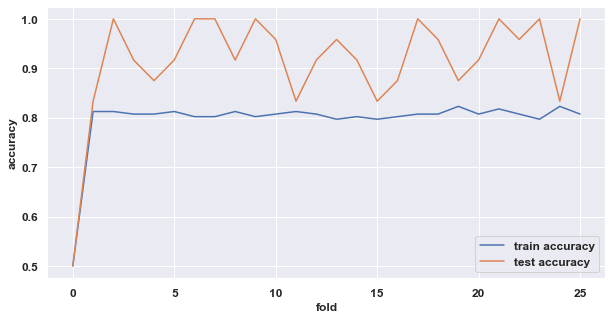

In [118]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda_matrix, lda_report, lda_1 = fit_predict(lda, X, y, 25)

In [119]:
eval_df = pd.DataFrame({'model': models,
                        'accuracy':accuracy,
                        'f1-score':F1score,
                        'AUC-ROC':aucroc})
eval_df 

,model,accuracy,f1-score,AUC-ROC
0,LogisticRegression,0.780,0.756000,0.940000
1,DecisionTreeClassifier,0.895,0.881333,0.930000
2,RandomForestClassifier,0.925,0.918000,0.993333
3,CatBoostClassifier,0.925,0.918000,0.994167
4,KNeighborsClassifier,0.710,0.682000,0.901667
5,GaussianNB,0.800,0.780667,0.936667
6,LinearDiscriminantAnalysis,0.775,0.754667,0.931667


In [124]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1)

In [125]:
...
# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('CB', CatBoostClassifier()))


# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.778571 (0.067386)
LR: 0.785714 (0.090351)
GNB: 0.814286 (0.085714)
RF: 0.907143 (0.078571)
LDA: 0.778571 (0.087190)
DT: 0.885714 (0.065465)
Learning rate set to 0.071194
0:	learn: 1.2900983	total: 1.11ms	remaining: 1.11s
1:	learn: 1.2294674	total: 2.08ms	remaining: 1.04s
2:	learn: 1.1549053	total: 3.08ms	remaining: 1.02s
3:	learn: 1.0896347	total: 4.23ms	remaining: 1.05s
4:	learn: 1.0267738	total: 5.21ms	remaining: 1.04s
5:	learn: 0.9816482	total: 6.1ms	remaining: 1.01s
6:	learn: 0.9411353	total: 7.07ms	remaining: 1s
7:	learn: 0.9069767	total: 7.85ms	remaining: 973ms
8:	learn: 0.8659316	total: 8.56ms	remaining: 943ms
9:	learn: 0.8209395	total: 9.43ms	remaining: 934ms
10:	learn: 0.7929914	total: 10.1ms	remaining: 910ms
11:	learn: 0.7579087	total: 10.9ms	remaining: 895ms
12:	learn: 0.7255731	total: 11.6ms	remaining: 879ms
13:	learn: 0.6988316	total: 12.4ms	remaining: 872ms
14:	learn: 0.6770599	total: 12.9ms	remaining: 847ms
15:	learn: 0.6525800	total: 13.6ms	remaining: 837ms
16:	l

184:	learn: 0.0792985	total: 140ms	remaining: 615ms
185:	learn: 0.0789924	total: 141ms	remaining: 615ms
186:	learn: 0.0787715	total: 141ms	remaining: 613ms
187:	learn: 0.0781299	total: 142ms	remaining: 614ms
188:	learn: 0.0775412	total: 143ms	remaining: 616ms
189:	learn: 0.0771416	total: 144ms	remaining: 616ms
190:	learn: 0.0768646	total: 145ms	remaining: 616ms
191:	learn: 0.0764868	total: 146ms	remaining: 616ms
192:	learn: 0.0760665	total: 147ms	remaining: 616ms
193:	learn: 0.0756276	total: 148ms	remaining: 617ms
194:	learn: 0.0752094	total: 149ms	remaining: 617ms
195:	learn: 0.0747517	total: 150ms	remaining: 617ms
196:	learn: 0.0744606	total: 152ms	remaining: 618ms
197:	learn: 0.0738596	total: 153ms	remaining: 619ms
198:	learn: 0.0735226	total: 154ms	remaining: 620ms
199:	learn: 0.0731944	total: 156ms	remaining: 623ms
200:	learn: 0.0727348	total: 157ms	remaining: 623ms
201:	learn: 0.0724564	total: 158ms	remaining: 623ms
202:	learn: 0.0720707	total: 159ms	remaining: 623ms
203:	learn: 

374:	learn: 0.0366783	total: 311ms	remaining: 519ms
375:	learn: 0.0365639	total: 313ms	remaining: 519ms
376:	learn: 0.0363926	total: 314ms	remaining: 518ms
377:	learn: 0.0363614	total: 315ms	remaining: 518ms
378:	learn: 0.0362571	total: 316ms	remaining: 518ms
379:	learn: 0.0361317	total: 317ms	remaining: 517ms
380:	learn: 0.0359783	total: 318ms	remaining: 516ms
381:	learn: 0.0358665	total: 319ms	remaining: 516ms
382:	learn: 0.0357597	total: 320ms	remaining: 515ms
383:	learn: 0.0356948	total: 321ms	remaining: 514ms
384:	learn: 0.0355797	total: 322ms	remaining: 514ms
385:	learn: 0.0354309	total: 323ms	remaining: 514ms
386:	learn: 0.0353305	total: 324ms	remaining: 513ms
387:	learn: 0.0351274	total: 325ms	remaining: 512ms
388:	learn: 0.0350037	total: 326ms	remaining: 512ms
389:	learn: 0.0349015	total: 327ms	remaining: 512ms
390:	learn: 0.0348464	total: 328ms	remaining: 511ms
391:	learn: 0.0347143	total: 329ms	remaining: 510ms
392:	learn: 0.0346067	total: 330ms	remaining: 510ms
393:	learn: 

577:	learn: 0.0215137	total: 485ms	remaining: 354ms
578:	learn: 0.0214455	total: 486ms	remaining: 353ms
579:	learn: 0.0213970	total: 486ms	remaining: 352ms
580:	learn: 0.0213833	total: 488ms	remaining: 352ms
581:	learn: 0.0213111	total: 489ms	remaining: 351ms
582:	learn: 0.0212729	total: 490ms	remaining: 350ms
583:	learn: 0.0212593	total: 491ms	remaining: 349ms
584:	learn: 0.0212207	total: 491ms	remaining: 349ms
585:	learn: 0.0211836	total: 492ms	remaining: 348ms
586:	learn: 0.0211456	total: 493ms	remaining: 347ms
587:	learn: 0.0211043	total: 494ms	remaining: 346ms
588:	learn: 0.0210791	total: 495ms	remaining: 346ms
589:	learn: 0.0210350	total: 496ms	remaining: 345ms
590:	learn: 0.0209994	total: 497ms	remaining: 344ms
591:	learn: 0.0209490	total: 498ms	remaining: 343ms
592:	learn: 0.0209092	total: 499ms	remaining: 343ms
593:	learn: 0.0208567	total: 500ms	remaining: 342ms
594:	learn: 0.0208185	total: 501ms	remaining: 341ms
595:	learn: 0.0207737	total: 502ms	remaining: 341ms
596:	learn: 

764:	learn: 0.0152572	total: 658ms	remaining: 202ms
765:	learn: 0.0152330	total: 659ms	remaining: 201ms
766:	learn: 0.0152078	total: 660ms	remaining: 200ms
767:	learn: 0.0152024	total: 661ms	remaining: 200ms
768:	learn: 0.0151807	total: 662ms	remaining: 199ms
769:	learn: 0.0151597	total: 662ms	remaining: 198ms
770:	learn: 0.0151434	total: 663ms	remaining: 197ms
771:	learn: 0.0151082	total: 664ms	remaining: 196ms
772:	learn: 0.0150931	total: 665ms	remaining: 195ms
773:	learn: 0.0150878	total: 666ms	remaining: 195ms
774:	learn: 0.0150700	total: 667ms	remaining: 194ms
775:	learn: 0.0150474	total: 668ms	remaining: 193ms
776:	learn: 0.0150295	total: 669ms	remaining: 192ms
777:	learn: 0.0150050	total: 670ms	remaining: 191ms
778:	learn: 0.0149876	total: 671ms	remaining: 190ms
779:	learn: 0.0149604	total: 672ms	remaining: 190ms
780:	learn: 0.0149556	total: 673ms	remaining: 189ms
781:	learn: 0.0149294	total: 674ms	remaining: 188ms
782:	learn: 0.0149023	total: 675ms	remaining: 187ms
783:	learn: 

932:	learn: 0.0120333	total: 831ms	remaining: 59.6ms
933:	learn: 0.0120247	total: 832ms	remaining: 58.8ms
934:	learn: 0.0119995	total: 833ms	remaining: 57.9ms
935:	learn: 0.0119871	total: 834ms	remaining: 57ms
936:	learn: 0.0119750	total: 835ms	remaining: 56.1ms
937:	learn: 0.0119598	total: 836ms	remaining: 55.2ms
938:	learn: 0.0119465	total: 837ms	remaining: 54.4ms
939:	learn: 0.0119305	total: 839ms	remaining: 53.5ms
940:	learn: 0.0119164	total: 840ms	remaining: 52.6ms
941:	learn: 0.0118932	total: 840ms	remaining: 51.7ms
942:	learn: 0.0118652	total: 841ms	remaining: 50.9ms
943:	learn: 0.0118525	total: 843ms	remaining: 50ms
944:	learn: 0.0118454	total: 844ms	remaining: 49.1ms
945:	learn: 0.0118397	total: 845ms	remaining: 48.2ms
946:	learn: 0.0118254	total: 846ms	remaining: 47.4ms
947:	learn: 0.0118073	total: 847ms	remaining: 46.5ms
948:	learn: 0.0117943	total: 848ms	remaining: 45.6ms
949:	learn: 0.0117700	total: 849ms	remaining: 44.7ms
950:	learn: 0.0117512	total: 850ms	remaining: 43.8

239:	learn: 0.0665641	total: 242ms	remaining: 766ms
240:	learn: 0.0663666	total: 243ms	remaining: 766ms
241:	learn: 0.0661430	total: 244ms	remaining: 765ms
242:	learn: 0.0657813	total: 245ms	remaining: 765ms
243:	learn: 0.0655444	total: 247ms	remaining: 765ms
244:	learn: 0.0653118	total: 248ms	remaining: 764ms
245:	learn: 0.0649370	total: 249ms	remaining: 762ms
246:	learn: 0.0645819	total: 250ms	remaining: 762ms
247:	learn: 0.0642829	total: 251ms	remaining: 762ms
248:	learn: 0.0639527	total: 252ms	remaining: 761ms
249:	learn: 0.0635756	total: 253ms	remaining: 760ms
250:	learn: 0.0633312	total: 254ms	remaining: 759ms
251:	learn: 0.0630998	total: 255ms	remaining: 758ms
252:	learn: 0.0626773	total: 256ms	remaining: 756ms
253:	learn: 0.0624703	total: 257ms	remaining: 755ms
254:	learn: 0.0622041	total: 258ms	remaining: 753ms
255:	learn: 0.0619344	total: 259ms	remaining: 752ms
256:	learn: 0.0617431	total: 260ms	remaining: 751ms
257:	learn: 0.0614696	total: 261ms	remaining: 750ms
258:	learn: 

408:	learn: 0.0359150	total: 413ms	remaining: 597ms
409:	learn: 0.0358355	total: 415ms	remaining: 597ms
410:	learn: 0.0356986	total: 416ms	remaining: 596ms
411:	learn: 0.0355457	total: 417ms	remaining: 595ms
412:	learn: 0.0354411	total: 418ms	remaining: 594ms
413:	learn: 0.0353330	total: 419ms	remaining: 594ms
414:	learn: 0.0352496	total: 421ms	remaining: 593ms
415:	learn: 0.0351524	total: 422ms	remaining: 592ms
416:	learn: 0.0350476	total: 423ms	remaining: 591ms
417:	learn: 0.0349624	total: 424ms	remaining: 590ms
418:	learn: 0.0348726	total: 425ms	remaining: 589ms
419:	learn: 0.0347580	total: 426ms	remaining: 588ms
420:	learn: 0.0346241	total: 427ms	remaining: 587ms
421:	learn: 0.0345153	total: 428ms	remaining: 586ms
422:	learn: 0.0344161	total: 429ms	remaining: 585ms
423:	learn: 0.0343500	total: 430ms	remaining: 584ms
424:	learn: 0.0342222	total: 431ms	remaining: 583ms
425:	learn: 0.0341263	total: 432ms	remaining: 582ms
426:	learn: 0.0340307	total: 433ms	remaining: 582ms
427:	learn: 

568:	learn: 0.0241042	total: 584ms	remaining: 442ms
569:	learn: 0.0240451	total: 585ms	remaining: 441ms
570:	learn: 0.0240205	total: 586ms	remaining: 440ms
571:	learn: 0.0239935	total: 587ms	remaining: 439ms
572:	learn: 0.0239410	total: 588ms	remaining: 439ms
573:	learn: 0.0238778	total: 589ms	remaining: 437ms
574:	learn: 0.0238255	total: 590ms	remaining: 436ms
575:	learn: 0.0237803	total: 591ms	remaining: 435ms
576:	learn: 0.0237290	total: 592ms	remaining: 434ms
577:	learn: 0.0236861	total: 593ms	remaining: 433ms
578:	learn: 0.0236323	total: 594ms	remaining: 432ms
579:	learn: 0.0235703	total: 595ms	remaining: 431ms
580:	learn: 0.0235263	total: 596ms	remaining: 430ms
581:	learn: 0.0234949	total: 597ms	remaining: 429ms
582:	learn: 0.0234308	total: 598ms	remaining: 427ms
583:	learn: 0.0233939	total: 599ms	remaining: 426ms
584:	learn: 0.0233487	total: 599ms	remaining: 425ms
585:	learn: 0.0232955	total: 600ms	remaining: 424ms
586:	learn: 0.0232742	total: 601ms	remaining: 423ms
587:	learn: 

737:	learn: 0.0178231	total: 756ms	remaining: 268ms
738:	learn: 0.0177949	total: 757ms	remaining: 267ms
739:	learn: 0.0177770	total: 758ms	remaining: 266ms
740:	learn: 0.0177601	total: 759ms	remaining: 265ms
741:	learn: 0.0177226	total: 760ms	remaining: 264ms
742:	learn: 0.0177012	total: 761ms	remaining: 263ms
743:	learn: 0.0176932	total: 762ms	remaining: 262ms
744:	learn: 0.0176621	total: 763ms	remaining: 261ms
745:	learn: 0.0176395	total: 764ms	remaining: 260ms
746:	learn: 0.0176093	total: 764ms	remaining: 259ms
747:	learn: 0.0175655	total: 765ms	remaining: 258ms
748:	learn: 0.0175413	total: 766ms	remaining: 257ms
749:	learn: 0.0175204	total: 767ms	remaining: 256ms
750:	learn: 0.0174936	total: 768ms	remaining: 255ms
751:	learn: 0.0174579	total: 769ms	remaining: 253ms
752:	learn: 0.0174405	total: 769ms	remaining: 252ms
753:	learn: 0.0174195	total: 770ms	remaining: 251ms
754:	learn: 0.0174056	total: 771ms	remaining: 250ms
755:	learn: 0.0173712	total: 772ms	remaining: 249ms
756:	learn: 

916:	learn: 0.0139049	total: 929ms	remaining: 84.1ms
917:	learn: 0.0138938	total: 931ms	remaining: 83.2ms
918:	learn: 0.0138764	total: 932ms	remaining: 82.2ms
919:	learn: 0.0138674	total: 934ms	remaining: 81.2ms
920:	learn: 0.0138539	total: 935ms	remaining: 80.2ms
921:	learn: 0.0138460	total: 936ms	remaining: 79.1ms
922:	learn: 0.0138310	total: 936ms	remaining: 78.1ms
923:	learn: 0.0138223	total: 937ms	remaining: 77.1ms
924:	learn: 0.0138105	total: 938ms	remaining: 76.1ms
925:	learn: 0.0137846	total: 939ms	remaining: 75.1ms
926:	learn: 0.0137666	total: 940ms	remaining: 74ms
927:	learn: 0.0137480	total: 941ms	remaining: 73ms
928:	learn: 0.0137370	total: 944ms	remaining: 72.1ms
929:	learn: 0.0137315	total: 945ms	remaining: 71.2ms
930:	learn: 0.0137102	total: 947ms	remaining: 70.2ms
931:	learn: 0.0137019	total: 950ms	remaining: 69.3ms
932:	learn: 0.0136892	total: 951ms	remaining: 68.3ms
933:	learn: 0.0136645	total: 952ms	remaining: 67.3ms
934:	learn: 0.0136528	total: 953ms	remaining: 66.3

209:	learn: 0.0549742	total: 222ms	remaining: 835ms
210:	learn: 0.0547426	total: 223ms	remaining: 834ms
211:	learn: 0.0544460	total: 224ms	remaining: 833ms
212:	learn: 0.0539741	total: 225ms	remaining: 833ms
213:	learn: 0.0536225	total: 226ms	remaining: 831ms
214:	learn: 0.0533788	total: 227ms	remaining: 829ms
215:	learn: 0.0530951	total: 228ms	remaining: 827ms
216:	learn: 0.0527302	total: 229ms	remaining: 825ms
217:	learn: 0.0524165	total: 230ms	remaining: 826ms
218:	learn: 0.0523087	total: 231ms	remaining: 824ms
219:	learn: 0.0520516	total: 232ms	remaining: 823ms
220:	learn: 0.0516851	total: 233ms	remaining: 822ms
221:	learn: 0.0513992	total: 234ms	remaining: 821ms
222:	learn: 0.0512740	total: 235ms	remaining: 820ms
223:	learn: 0.0510393	total: 236ms	remaining: 819ms
224:	learn: 0.0508419	total: 237ms	remaining: 817ms
225:	learn: 0.0506343	total: 238ms	remaining: 815ms
226:	learn: 0.0503525	total: 239ms	remaining: 814ms
227:	learn: 0.0501732	total: 240ms	remaining: 813ms
228:	learn: 

545:	learn: 0.0183201	total: 565ms	remaining: 470ms
546:	learn: 0.0182702	total: 566ms	remaining: 469ms
547:	learn: 0.0182312	total: 567ms	remaining: 468ms
548:	learn: 0.0181862	total: 568ms	remaining: 467ms
549:	learn: 0.0181551	total: 569ms	remaining: 466ms
550:	learn: 0.0181466	total: 571ms	remaining: 465ms
551:	learn: 0.0181022	total: 572ms	remaining: 464ms
552:	learn: 0.0180674	total: 573ms	remaining: 463ms
553:	learn: 0.0180414	total: 573ms	remaining: 462ms
554:	learn: 0.0180139	total: 574ms	remaining: 460ms
555:	learn: 0.0179869	total: 575ms	remaining: 459ms
556:	learn: 0.0179538	total: 576ms	remaining: 458ms
557:	learn: 0.0179142	total: 578ms	remaining: 458ms
558:	learn: 0.0178770	total: 579ms	remaining: 456ms
559:	learn: 0.0178310	total: 580ms	remaining: 455ms
560:	learn: 0.0177759	total: 581ms	remaining: 454ms
561:	learn: 0.0177629	total: 582ms	remaining: 453ms
562:	learn: 0.0177331	total: 582ms	remaining: 452ms
563:	learn: 0.0176963	total: 583ms	remaining: 451ms
564:	learn: 

710:	learn: 0.0136115	total: 736ms	remaining: 299ms
711:	learn: 0.0135865	total: 737ms	remaining: 298ms
712:	learn: 0.0135724	total: 738ms	remaining: 297ms
713:	learn: 0.0135565	total: 739ms	remaining: 296ms
714:	learn: 0.0135270	total: 740ms	remaining: 295ms
715:	learn: 0.0135116	total: 741ms	remaining: 294ms
716:	learn: 0.0134954	total: 742ms	remaining: 293ms
717:	learn: 0.0134707	total: 743ms	remaining: 292ms
718:	learn: 0.0134514	total: 744ms	remaining: 291ms
719:	learn: 0.0134478	total: 745ms	remaining: 290ms
720:	learn: 0.0134246	total: 746ms	remaining: 289ms
721:	learn: 0.0134040	total: 747ms	remaining: 288ms
722:	learn: 0.0133825	total: 748ms	remaining: 286ms
723:	learn: 0.0133707	total: 749ms	remaining: 285ms
724:	learn: 0.0133521	total: 750ms	remaining: 284ms
725:	learn: 0.0133209	total: 751ms	remaining: 283ms
726:	learn: 0.0132886	total: 752ms	remaining: 282ms
727:	learn: 0.0132713	total: 753ms	remaining: 281ms
728:	learn: 0.0132544	total: 754ms	remaining: 280ms
729:	learn: 

891:	learn: 0.0106100	total: 908ms	remaining: 110ms
892:	learn: 0.0105953	total: 909ms	remaining: 109ms
893:	learn: 0.0105898	total: 911ms	remaining: 108ms
894:	learn: 0.0105762	total: 912ms	remaining: 107ms
895:	learn: 0.0105598	total: 913ms	remaining: 106ms
896:	learn: 0.0105472	total: 914ms	remaining: 105ms
897:	learn: 0.0105356	total: 915ms	remaining: 104ms
898:	learn: 0.0105256	total: 917ms	remaining: 103ms
899:	learn: 0.0105090	total: 918ms	remaining: 102ms
900:	learn: 0.0104959	total: 919ms	remaining: 101ms
901:	learn: 0.0104841	total: 920ms	remaining: 100ms
902:	learn: 0.0104762	total: 921ms	remaining: 99ms
903:	learn: 0.0104516	total: 922ms	remaining: 97.9ms
904:	learn: 0.0104440	total: 923ms	remaining: 96.9ms
905:	learn: 0.0104284	total: 924ms	remaining: 95.9ms
906:	learn: 0.0104078	total: 926ms	remaining: 94.9ms
907:	learn: 0.0103997	total: 927ms	remaining: 93.9ms
908:	learn: 0.0103862	total: 928ms	remaining: 92.9ms
909:	learn: 0.0103673	total: 929ms	remaining: 91.9ms
910:	l

121:	learn: 0.1314287	total: 119ms	remaining: 853ms
122:	learn: 0.1307919	total: 120ms	remaining: 853ms
123:	learn: 0.1299829	total: 121ms	remaining: 853ms
124:	learn: 0.1292191	total: 122ms	remaining: 854ms
125:	learn: 0.1285998	total: 123ms	remaining: 855ms
126:	learn: 0.1278859	total: 124ms	remaining: 855ms
127:	learn: 0.1266963	total: 125ms	remaining: 853ms
128:	learn: 0.1257557	total: 126ms	remaining: 852ms
129:	learn: 0.1247724	total: 128ms	remaining: 853ms
130:	learn: 0.1239552	total: 129ms	remaining: 854ms
131:	learn: 0.1226592	total: 130ms	remaining: 853ms
132:	learn: 0.1218631	total: 130ms	remaining: 851ms
133:	learn: 0.1207635	total: 131ms	remaining: 850ms
134:	learn: 0.1197323	total: 133ms	remaining: 851ms
135:	learn: 0.1185011	total: 134ms	remaining: 850ms
136:	learn: 0.1173060	total: 135ms	remaining: 849ms
137:	learn: 0.1166371	total: 136ms	remaining: 849ms
138:	learn: 0.1156830	total: 137ms	remaining: 849ms
139:	learn: 0.1149044	total: 138ms	remaining: 849ms
140:	learn: 

431:	learn: 0.0314052	total: 453ms	remaining: 596ms
432:	learn: 0.0313580	total: 454ms	remaining: 595ms
433:	learn: 0.0312438	total: 457ms	remaining: 596ms
434:	learn: 0.0311381	total: 458ms	remaining: 595ms
435:	learn: 0.0310710	total: 459ms	remaining: 594ms
436:	learn: 0.0309796	total: 460ms	remaining: 593ms
437:	learn: 0.0309170	total: 461ms	remaining: 591ms
438:	learn: 0.0308453	total: 462ms	remaining: 590ms
439:	learn: 0.0307862	total: 463ms	remaining: 589ms
440:	learn: 0.0307135	total: 464ms	remaining: 588ms
441:	learn: 0.0306254	total: 465ms	remaining: 587ms
442:	learn: 0.0305599	total: 466ms	remaining: 586ms
443:	learn: 0.0305104	total: 467ms	remaining: 585ms
444:	learn: 0.0304424	total: 468ms	remaining: 584ms
445:	learn: 0.0303302	total: 469ms	remaining: 583ms
446:	learn: 0.0302445	total: 471ms	remaining: 583ms
447:	learn: 0.0301816	total: 472ms	remaining: 582ms
448:	learn: 0.0300622	total: 473ms	remaining: 580ms
449:	learn: 0.0299881	total: 474ms	remaining: 579ms
450:	learn: 

596:	learn: 0.0215468	total: 625ms	remaining: 422ms
597:	learn: 0.0214893	total: 627ms	remaining: 421ms
598:	learn: 0.0214507	total: 628ms	remaining: 420ms
599:	learn: 0.0214022	total: 629ms	remaining: 420ms
600:	learn: 0.0213333	total: 631ms	remaining: 419ms
601:	learn: 0.0212969	total: 631ms	remaining: 417ms
602:	learn: 0.0212458	total: 632ms	remaining: 416ms
603:	learn: 0.0212110	total: 633ms	remaining: 415ms
604:	learn: 0.0211491	total: 634ms	remaining: 414ms
605:	learn: 0.0210764	total: 635ms	remaining: 413ms
606:	learn: 0.0210458	total: 635ms	remaining: 411ms
607:	learn: 0.0210116	total: 637ms	remaining: 411ms
608:	learn: 0.0209464	total: 638ms	remaining: 409ms
609:	learn: 0.0209163	total: 639ms	remaining: 409ms
610:	learn: 0.0208897	total: 640ms	remaining: 408ms
611:	learn: 0.0208605	total: 641ms	remaining: 407ms
612:	learn: 0.0208151	total: 642ms	remaining: 405ms
613:	learn: 0.0207723	total: 644ms	remaining: 405ms
614:	learn: 0.0207349	total: 645ms	remaining: 404ms
615:	learn: 

767:	learn: 0.0159600	total: 797ms	remaining: 241ms
768:	learn: 0.0159352	total: 798ms	remaining: 240ms
769:	learn: 0.0159024	total: 799ms	remaining: 239ms
770:	learn: 0.0158545	total: 800ms	remaining: 238ms
771:	learn: 0.0158110	total: 801ms	remaining: 237ms
772:	learn: 0.0157877	total: 803ms	remaining: 236ms
773:	learn: 0.0157673	total: 803ms	remaining: 235ms
774:	learn: 0.0157407	total: 804ms	remaining: 234ms
775:	learn: 0.0157223	total: 805ms	remaining: 232ms
776:	learn: 0.0156982	total: 806ms	remaining: 231ms
777:	learn: 0.0156636	total: 807ms	remaining: 230ms
778:	learn: 0.0156325	total: 808ms	remaining: 229ms
779:	learn: 0.0156127	total: 809ms	remaining: 228ms
780:	learn: 0.0156003	total: 810ms	remaining: 227ms
781:	learn: 0.0155818	total: 811ms	remaining: 226ms
782:	learn: 0.0155685	total: 812ms	remaining: 225ms
783:	learn: 0.0155451	total: 813ms	remaining: 224ms
784:	learn: 0.0155135	total: 814ms	remaining: 223ms
785:	learn: 0.0154930	total: 815ms	remaining: 222ms
786:	learn: 

935:	learn: 0.0125443	total: 970ms	remaining: 66.3ms
936:	learn: 0.0125359	total: 970ms	remaining: 65.2ms
937:	learn: 0.0125171	total: 972ms	remaining: 64.2ms
938:	learn: 0.0125053	total: 973ms	remaining: 63.2ms
939:	learn: 0.0124959	total: 974ms	remaining: 62.2ms
940:	learn: 0.0124840	total: 975ms	remaining: 61.1ms
941:	learn: 0.0124591	total: 976ms	remaining: 60.1ms
942:	learn: 0.0124462	total: 977ms	remaining: 59ms
943:	learn: 0.0124302	total: 978ms	remaining: 58ms
944:	learn: 0.0124201	total: 979ms	remaining: 57ms
945:	learn: 0.0124081	total: 980ms	remaining: 55.9ms
946:	learn: 0.0123977	total: 981ms	remaining: 54.9ms
947:	learn: 0.0123863	total: 982ms	remaining: 53.8ms
948:	learn: 0.0123752	total: 983ms	remaining: 52.8ms
949:	learn: 0.0123605	total: 984ms	remaining: 51.8ms
950:	learn: 0.0123522	total: 985ms	remaining: 50.7ms
951:	learn: 0.0123373	total: 986ms	remaining: 49.7ms
952:	learn: 0.0123317	total: 987ms	remaining: 48.7ms
953:	learn: 0.0123187	total: 988ms	remaining: 47.6ms

203:	learn: 0.0798329	total: 248ms	remaining: 967ms
204:	learn: 0.0793834	total: 251ms	remaining: 974ms
205:	learn: 0.0791414	total: 253ms	remaining: 976ms
206:	learn: 0.0787088	total: 255ms	remaining: 975ms
207:	learn: 0.0783084	total: 256ms	remaining: 976ms
208:	learn: 0.0778114	total: 257ms	remaining: 973ms
209:	learn: 0.0773624	total: 259ms	remaining: 973ms
210:	learn: 0.0769171	total: 261ms	remaining: 974ms
211:	learn: 0.0766754	total: 261ms	remaining: 972ms
212:	learn: 0.0763433	total: 263ms	remaining: 970ms
213:	learn: 0.0756139	total: 264ms	remaining: 969ms
214:	learn: 0.0753261	total: 265ms	remaining: 966ms
215:	learn: 0.0749474	total: 266ms	remaining: 966ms
216:	learn: 0.0745437	total: 267ms	remaining: 964ms
217:	learn: 0.0743067	total: 269ms	remaining: 963ms
218:	learn: 0.0740010	total: 270ms	remaining: 963ms
219:	learn: 0.0736468	total: 271ms	remaining: 961ms
220:	learn: 0.0732707	total: 273ms	remaining: 961ms
221:	learn: 0.0730102	total: 274ms	remaining: 959ms
222:	learn: 

430:	learn: 0.0330533	total: 575ms	remaining: 759ms
431:	learn: 0.0329382	total: 577ms	remaining: 758ms
432:	learn: 0.0328138	total: 578ms	remaining: 757ms
433:	learn: 0.0327446	total: 580ms	remaining: 756ms
434:	learn: 0.0327002	total: 581ms	remaining: 755ms
435:	learn: 0.0326248	total: 582ms	remaining: 753ms
436:	learn: 0.0324949	total: 583ms	remaining: 751ms
437:	learn: 0.0323441	total: 584ms	remaining: 749ms
438:	learn: 0.0321470	total: 585ms	remaining: 747ms
439:	learn: 0.0320695	total: 586ms	remaining: 746ms
440:	learn: 0.0319509	total: 587ms	remaining: 744ms
441:	learn: 0.0318550	total: 588ms	remaining: 742ms
442:	learn: 0.0317284	total: 589ms	remaining: 741ms
443:	learn: 0.0316059	total: 590ms	remaining: 739ms
444:	learn: 0.0315239	total: 591ms	remaining: 737ms
445:	learn: 0.0314595	total: 592ms	remaining: 735ms
446:	learn: 0.0313957	total: 593ms	remaining: 734ms
447:	learn: 0.0312112	total: 596ms	remaining: 734ms
448:	learn: 0.0311368	total: 597ms	remaining: 732ms
449:	learn: 

724:	learn: 0.0176317	total: 919ms	remaining: 349ms
725:	learn: 0.0176083	total: 920ms	remaining: 347ms
726:	learn: 0.0175781	total: 922ms	remaining: 346ms
727:	learn: 0.0175560	total: 923ms	remaining: 345ms
728:	learn: 0.0175131	total: 924ms	remaining: 344ms
729:	learn: 0.0174810	total: 925ms	remaining: 342ms
730:	learn: 0.0174500	total: 926ms	remaining: 341ms
731:	learn: 0.0173876	total: 927ms	remaining: 339ms
732:	learn: 0.0173638	total: 928ms	remaining: 338ms
733:	learn: 0.0173436	total: 929ms	remaining: 337ms
734:	learn: 0.0173188	total: 930ms	remaining: 335ms
735:	learn: 0.0172883	total: 930ms	remaining: 334ms
736:	learn: 0.0172673	total: 931ms	remaining: 332ms
737:	learn: 0.0172461	total: 932ms	remaining: 331ms
738:	learn: 0.0172115	total: 933ms	remaining: 330ms
739:	learn: 0.0171699	total: 934ms	remaining: 328ms
740:	learn: 0.0171467	total: 936ms	remaining: 327ms
741:	learn: 0.0171162	total: 937ms	remaining: 326ms
742:	learn: 0.0171009	total: 939ms	remaining: 325ms
743:	learn: 

883:	learn: 0.0140071	total: 1.09s	remaining: 143ms
884:	learn: 0.0139839	total: 1.09s	remaining: 142ms
885:	learn: 0.0139713	total: 1.09s	remaining: 141ms
886:	learn: 0.0139416	total: 1.09s	remaining: 139ms
887:	learn: 0.0139264	total: 1.1s	remaining: 138ms
888:	learn: 0.0139071	total: 1.1s	remaining: 137ms
889:	learn: 0.0138837	total: 1.1s	remaining: 136ms
890:	learn: 0.0138645	total: 1.1s	remaining: 134ms
891:	learn: 0.0138473	total: 1.1s	remaining: 133ms
892:	learn: 0.0138286	total: 1.1s	remaining: 132ms
893:	learn: 0.0138068	total: 1.1s	remaining: 131ms
894:	learn: 0.0137929	total: 1.1s	remaining: 129ms
895:	learn: 0.0137842	total: 1.1s	remaining: 128ms
896:	learn: 0.0137456	total: 1.1s	remaining: 127ms
897:	learn: 0.0137224	total: 1.1s	remaining: 126ms
898:	learn: 0.0137013	total: 1.11s	remaining: 124ms
899:	learn: 0.0136795	total: 1.11s	remaining: 123ms
900:	learn: 0.0136648	total: 1.11s	remaining: 122ms
901:	learn: 0.0136458	total: 1.11s	remaining: 121ms
902:	learn: 0.0136302	t

181:	learn: 0.0814908	total: 191ms	remaining: 860ms
182:	learn: 0.0809978	total: 193ms	remaining: 860ms
183:	learn: 0.0804435	total: 194ms	remaining: 859ms
184:	learn: 0.0798347	total: 195ms	remaining: 859ms
185:	learn: 0.0792746	total: 196ms	remaining: 857ms
186:	learn: 0.0788884	total: 197ms	remaining: 857ms
187:	learn: 0.0784041	total: 198ms	remaining: 856ms
188:	learn: 0.0778257	total: 199ms	remaining: 855ms
189:	learn: 0.0774232	total: 200ms	remaining: 853ms
190:	learn: 0.0769556	total: 201ms	remaining: 851ms
191:	learn: 0.0764631	total: 202ms	remaining: 849ms
192:	learn: 0.0760356	total: 204ms	remaining: 853ms
193:	learn: 0.0756995	total: 206ms	remaining: 856ms
194:	learn: 0.0752811	total: 207ms	remaining: 856ms
195:	learn: 0.0749659	total: 209ms	remaining: 855ms
196:	learn: 0.0744471	total: 210ms	remaining: 854ms
197:	learn: 0.0741929	total: 211ms	remaining: 854ms
198:	learn: 0.0739084	total: 212ms	remaining: 852ms
199:	learn: 0.0736255	total: 213ms	remaining: 852ms
200:	learn: 

471:	learn: 0.0274729	total: 513ms	remaining: 574ms
472:	learn: 0.0273800	total: 514ms	remaining: 573ms
473:	learn: 0.0273374	total: 516ms	remaining: 572ms
474:	learn: 0.0272624	total: 516ms	remaining: 571ms
475:	learn: 0.0272220	total: 518ms	remaining: 570ms
476:	learn: 0.0271702	total: 519ms	remaining: 570ms
477:	learn: 0.0271082	total: 521ms	remaining: 569ms
478:	learn: 0.0270237	total: 522ms	remaining: 568ms
479:	learn: 0.0269304	total: 523ms	remaining: 567ms
480:	learn: 0.0269065	total: 525ms	remaining: 566ms
481:	learn: 0.0268063	total: 526ms	remaining: 565ms
482:	learn: 0.0267282	total: 527ms	remaining: 564ms
483:	learn: 0.0266490	total: 528ms	remaining: 562ms
484:	learn: 0.0265480	total: 528ms	remaining: 561ms
485:	learn: 0.0264858	total: 529ms	remaining: 560ms
486:	learn: 0.0264075	total: 530ms	remaining: 558ms
487:	learn: 0.0263817	total: 531ms	remaining: 557ms
488:	learn: 0.0263064	total: 532ms	remaining: 556ms
489:	learn: 0.0262328	total: 533ms	remaining: 555ms
490:	learn: 

774:	learn: 0.0152018	total: 827ms	remaining: 240ms
775:	learn: 0.0151942	total: 829ms	remaining: 239ms
776:	learn: 0.0151793	total: 830ms	remaining: 238ms
777:	learn: 0.0151541	total: 831ms	remaining: 237ms
778:	learn: 0.0151229	total: 832ms	remaining: 236ms
779:	learn: 0.0150874	total: 833ms	remaining: 235ms
780:	learn: 0.0150627	total: 834ms	remaining: 234ms
781:	learn: 0.0150471	total: 835ms	remaining: 233ms
782:	learn: 0.0150306	total: 836ms	remaining: 232ms
783:	learn: 0.0150147	total: 837ms	remaining: 231ms
784:	learn: 0.0150052	total: 838ms	remaining: 230ms
785:	learn: 0.0149888	total: 839ms	remaining: 229ms
786:	learn: 0.0149700	total: 840ms	remaining: 227ms
787:	learn: 0.0149611	total: 841ms	remaining: 226ms
788:	learn: 0.0149427	total: 842ms	remaining: 225ms
789:	learn: 0.0149228	total: 843ms	remaining: 224ms
790:	learn: 0.0149106	total: 845ms	remaining: 223ms
791:	learn: 0.0148659	total: 846ms	remaining: 222ms
792:	learn: 0.0148519	total: 847ms	remaining: 221ms
793:	learn: 

944:	learn: 0.0120909	total: 998ms	remaining: 58.1ms
945:	learn: 0.0120808	total: 999ms	remaining: 57ms
946:	learn: 0.0120723	total: 1s	remaining: 56ms
947:	learn: 0.0120639	total: 1s	remaining: 54.9ms
948:	learn: 0.0120563	total: 1s	remaining: 53.9ms
949:	learn: 0.0120428	total: 1s	remaining: 52.8ms
950:	learn: 0.0120335	total: 1s	remaining: 51.7ms
951:	learn: 0.0120223	total: 1s	remaining: 50.7ms
952:	learn: 0.0120100	total: 1.01s	remaining: 49.7ms
953:	learn: 0.0120071	total: 1.01s	remaining: 48.6ms
954:	learn: 0.0119953	total: 1.01s	remaining: 47.5ms
955:	learn: 0.0119804	total: 1.01s	remaining: 46.5ms
956:	learn: 0.0119673	total: 1.01s	remaining: 45.4ms
957:	learn: 0.0119540	total: 1.01s	remaining: 44.4ms
958:	learn: 0.0119392	total: 1.01s	remaining: 43.3ms
959:	learn: 0.0119215	total: 1.01s	remaining: 42.2ms
960:	learn: 0.0119048	total: 1.01s	remaining: 41.2ms
961:	learn: 0.0118827	total: 1.01s	remaining: 40.1ms
962:	learn: 0.0118697	total: 1.02s	remaining: 39.1ms
963:	learn: 0.0

260:	learn: 0.0503511	total: 263ms	remaining: 744ms
261:	learn: 0.0501385	total: 265ms	remaining: 745ms
262:	learn: 0.0499762	total: 266ms	remaining: 747ms
263:	learn: 0.0497964	total: 268ms	remaining: 746ms
264:	learn: 0.0495273	total: 269ms	remaining: 745ms
265:	learn: 0.0493158	total: 270ms	remaining: 744ms
266:	learn: 0.0491285	total: 270ms	remaining: 743ms
267:	learn: 0.0489182	total: 272ms	remaining: 742ms
268:	learn: 0.0487055	total: 272ms	remaining: 740ms
269:	learn: 0.0484622	total: 273ms	remaining: 739ms
270:	learn: 0.0481755	total: 274ms	remaining: 738ms
271:	learn: 0.0480515	total: 275ms	remaining: 736ms
272:	learn: 0.0477825	total: 276ms	remaining: 736ms
273:	learn: 0.0476180	total: 277ms	remaining: 735ms
274:	learn: 0.0473620	total: 278ms	remaining: 734ms
275:	learn: 0.0471665	total: 283ms	remaining: 743ms
276:	learn: 0.0470451	total: 285ms	remaining: 743ms
277:	learn: 0.0468013	total: 286ms	remaining: 742ms
278:	learn: 0.0466452	total: 287ms	remaining: 741ms
279:	learn: 

420:	learn: 0.0288330	total: 435ms	remaining: 598ms
421:	learn: 0.0287015	total: 436ms	remaining: 597ms
422:	learn: 0.0286328	total: 437ms	remaining: 597ms
423:	learn: 0.0285800	total: 438ms	remaining: 596ms
424:	learn: 0.0285047	total: 440ms	remaining: 595ms
425:	learn: 0.0283931	total: 440ms	remaining: 593ms
426:	learn: 0.0283164	total: 441ms	remaining: 592ms
427:	learn: 0.0282487	total: 442ms	remaining: 591ms
428:	learn: 0.0281659	total: 443ms	remaining: 590ms
429:	learn: 0.0280681	total: 444ms	remaining: 588ms
430:	learn: 0.0279993	total: 445ms	remaining: 587ms
431:	learn: 0.0279371	total: 446ms	remaining: 586ms
432:	learn: 0.0278548	total: 446ms	remaining: 585ms
433:	learn: 0.0277674	total: 448ms	remaining: 584ms
434:	learn: 0.0276992	total: 449ms	remaining: 583ms
435:	learn: 0.0276068	total: 450ms	remaining: 582ms
436:	learn: 0.0275337	total: 451ms	remaining: 581ms
437:	learn: 0.0274115	total: 452ms	remaining: 580ms
438:	learn: 0.0273244	total: 454ms	remaining: 580ms
439:	learn: 

592:	learn: 0.0192285	total: 607ms	remaining: 417ms
593:	learn: 0.0191968	total: 608ms	remaining: 416ms
594:	learn: 0.0191550	total: 609ms	remaining: 415ms
595:	learn: 0.0191148	total: 610ms	remaining: 414ms
596:	learn: 0.0190712	total: 611ms	remaining: 413ms
597:	learn: 0.0190357	total: 612ms	remaining: 411ms
598:	learn: 0.0189674	total: 613ms	remaining: 410ms
599:	learn: 0.0189362	total: 614ms	remaining: 409ms
600:	learn: 0.0189082	total: 615ms	remaining: 408ms
601:	learn: 0.0188739	total: 616ms	remaining: 407ms
602:	learn: 0.0188438	total: 616ms	remaining: 406ms
603:	learn: 0.0188221	total: 617ms	remaining: 405ms
604:	learn: 0.0187831	total: 618ms	remaining: 404ms
605:	learn: 0.0187421	total: 619ms	remaining: 402ms
606:	learn: 0.0187143	total: 620ms	remaining: 401ms
607:	learn: 0.0186845	total: 621ms	remaining: 400ms
608:	learn: 0.0186446	total: 622ms	remaining: 399ms
609:	learn: 0.0186117	total: 623ms	remaining: 398ms
610:	learn: 0.0185926	total: 624ms	remaining: 397ms
611:	learn: 

752:	learn: 0.0144847	total: 777ms	remaining: 255ms
753:	learn: 0.0144594	total: 778ms	remaining: 254ms
754:	learn: 0.0144368	total: 779ms	remaining: 253ms
755:	learn: 0.0144146	total: 780ms	remaining: 252ms
756:	learn: 0.0143987	total: 781ms	remaining: 251ms
757:	learn: 0.0143828	total: 782ms	remaining: 250ms
758:	learn: 0.0143644	total: 784ms	remaining: 249ms
759:	learn: 0.0143476	total: 785ms	remaining: 248ms
760:	learn: 0.0143273	total: 786ms	remaining: 247ms
761:	learn: 0.0143129	total: 787ms	remaining: 246ms
762:	learn: 0.0142902	total: 788ms	remaining: 245ms
763:	learn: 0.0142639	total: 791ms	remaining: 244ms
764:	learn: 0.0142481	total: 792ms	remaining: 243ms
765:	learn: 0.0142266	total: 792ms	remaining: 242ms
766:	learn: 0.0142012	total: 795ms	remaining: 241ms
767:	learn: 0.0141733	total: 796ms	remaining: 241ms
768:	learn: 0.0141588	total: 797ms	remaining: 239ms
769:	learn: 0.0141373	total: 798ms	remaining: 238ms
770:	learn: 0.0141177	total: 799ms	remaining: 237ms
771:	learn: 

921:	learn: 0.0116095	total: 946ms	remaining: 80ms
922:	learn: 0.0116001	total: 947ms	remaining: 79ms
923:	learn: 0.0115867	total: 948ms	remaining: 78ms
924:	learn: 0.0115757	total: 949ms	remaining: 76.9ms
925:	learn: 0.0115629	total: 950ms	remaining: 75.9ms
926:	learn: 0.0115490	total: 951ms	remaining: 74.9ms
927:	learn: 0.0115351	total: 952ms	remaining: 73.8ms
928:	learn: 0.0115205	total: 952ms	remaining: 72.8ms
929:	learn: 0.0115123	total: 953ms	remaining: 71.7ms
930:	learn: 0.0114996	total: 954ms	remaining: 70.7ms
931:	learn: 0.0114842	total: 955ms	remaining: 69.6ms
932:	learn: 0.0114730	total: 955ms	remaining: 68.6ms
933:	learn: 0.0114568	total: 957ms	remaining: 67.6ms
934:	learn: 0.0114428	total: 959ms	remaining: 66.6ms
935:	learn: 0.0114308	total: 959ms	remaining: 65.6ms
936:	learn: 0.0114216	total: 960ms	remaining: 64.6ms
937:	learn: 0.0114087	total: 962ms	remaining: 63.6ms
938:	learn: 0.0114016	total: 963ms	remaining: 62.5ms
939:	learn: 0.0113901	total: 964ms	remaining: 61.5ms

236:	learn: 0.0583972	total: 232ms	remaining: 748ms
237:	learn: 0.0580737	total: 234ms	remaining: 748ms
238:	learn: 0.0578220	total: 235ms	remaining: 747ms
239:	learn: 0.0575072	total: 236ms	remaining: 746ms
240:	learn: 0.0572559	total: 236ms	remaining: 745ms
241:	learn: 0.0570042	total: 237ms	remaining: 743ms
242:	learn: 0.0567633	total: 238ms	remaining: 742ms
243:	learn: 0.0565955	total: 239ms	remaining: 741ms
244:	learn: 0.0562250	total: 240ms	remaining: 740ms
245:	learn: 0.0558640	total: 243ms	remaining: 744ms
246:	learn: 0.0556279	total: 244ms	remaining: 744ms
247:	learn: 0.0553852	total: 245ms	remaining: 743ms
248:	learn: 0.0550910	total: 246ms	remaining: 742ms
249:	learn: 0.0548892	total: 247ms	remaining: 741ms
250:	learn: 0.0547133	total: 248ms	remaining: 740ms
251:	learn: 0.0544195	total: 249ms	remaining: 740ms
252:	learn: 0.0541879	total: 251ms	remaining: 740ms
253:	learn: 0.0539141	total: 252ms	remaining: 739ms
254:	learn: 0.0537656	total: 253ms	remaining: 739ms
255:	learn: 

404:	learn: 0.0320831	total: 401ms	remaining: 590ms
405:	learn: 0.0319713	total: 402ms	remaining: 589ms
406:	learn: 0.0319262	total: 403ms	remaining: 587ms
407:	learn: 0.0318519	total: 404ms	remaining: 586ms
408:	learn: 0.0317106	total: 405ms	remaining: 585ms
409:	learn: 0.0316234	total: 406ms	remaining: 584ms
410:	learn: 0.0315112	total: 407ms	remaining: 583ms
411:	learn: 0.0314752	total: 408ms	remaining: 582ms
412:	learn: 0.0314048	total: 409ms	remaining: 581ms
413:	learn: 0.0313137	total: 410ms	remaining: 580ms
414:	learn: 0.0312206	total: 411ms	remaining: 579ms
415:	learn: 0.0311674	total: 411ms	remaining: 578ms
416:	learn: 0.0310868	total: 413ms	remaining: 577ms
417:	learn: 0.0310054	total: 414ms	remaining: 576ms
418:	learn: 0.0309318	total: 415ms	remaining: 575ms
419:	learn: 0.0308376	total: 416ms	remaining: 574ms
420:	learn: 0.0307538	total: 417ms	remaining: 573ms
421:	learn: 0.0306631	total: 418ms	remaining: 572ms
422:	learn: 0.0305679	total: 418ms	remaining: 571ms
423:	learn: 

611:	learn: 0.0193793	total: 568ms	remaining: 360ms
612:	learn: 0.0193477	total: 569ms	remaining: 359ms
613:	learn: 0.0193204	total: 569ms	remaining: 358ms
614:	learn: 0.0192896	total: 570ms	remaining: 357ms
615:	learn: 0.0192582	total: 572ms	remaining: 356ms
616:	learn: 0.0191991	total: 573ms	remaining: 355ms
617:	learn: 0.0191806	total: 573ms	remaining: 354ms
618:	learn: 0.0191362	total: 574ms	remaining: 353ms
619:	learn: 0.0191052	total: 575ms	remaining: 352ms
620:	learn: 0.0190775	total: 576ms	remaining: 352ms
621:	learn: 0.0190477	total: 577ms	remaining: 350ms
622:	learn: 0.0190263	total: 578ms	remaining: 350ms
623:	learn: 0.0189723	total: 579ms	remaining: 349ms
624:	learn: 0.0189338	total: 579ms	remaining: 348ms
625:	learn: 0.0188945	total: 580ms	remaining: 347ms
626:	learn: 0.0188567	total: 581ms	remaining: 346ms
627:	learn: 0.0188077	total: 582ms	remaining: 345ms
628:	learn: 0.0187414	total: 583ms	remaining: 344ms
629:	learn: 0.0186989	total: 583ms	remaining: 343ms
630:	learn: 

830:	learn: 0.0136189	total: 736ms	remaining: 150ms
831:	learn: 0.0135989	total: 737ms	remaining: 149ms
832:	learn: 0.0135754	total: 738ms	remaining: 148ms
833:	learn: 0.0135550	total: 739ms	remaining: 147ms
834:	learn: 0.0135361	total: 740ms	remaining: 146ms
835:	learn: 0.0135087	total: 740ms	remaining: 145ms
836:	learn: 0.0134921	total: 741ms	remaining: 144ms
837:	learn: 0.0134709	total: 742ms	remaining: 143ms
838:	learn: 0.0134535	total: 743ms	remaining: 143ms
839:	learn: 0.0134317	total: 744ms	remaining: 142ms
840:	learn: 0.0133994	total: 745ms	remaining: 141ms
841:	learn: 0.0133849	total: 746ms	remaining: 140ms
842:	learn: 0.0133760	total: 748ms	remaining: 139ms
843:	learn: 0.0133563	total: 749ms	remaining: 138ms
844:	learn: 0.0133217	total: 750ms	remaining: 138ms
845:	learn: 0.0133131	total: 751ms	remaining: 137ms
846:	learn: 0.0132998	total: 752ms	remaining: 136ms
847:	learn: 0.0132827	total: 753ms	remaining: 135ms
848:	learn: 0.0132660	total: 754ms	remaining: 134ms
849:	learn: 

3:	learn: 1.1060824	total: 3.27ms	remaining: 815ms
4:	learn: 1.0517565	total: 4.41ms	remaining: 878ms
5:	learn: 0.9981233	total: 5.22ms	remaining: 865ms
6:	learn: 0.9512870	total: 6.49ms	remaining: 921ms
7:	learn: 0.9088664	total: 7.52ms	remaining: 933ms
8:	learn: 0.8755199	total: 8.45ms	remaining: 930ms
9:	learn: 0.8313954	total: 9.3ms	remaining: 920ms
10:	learn: 0.7902422	total: 10.2ms	remaining: 918ms
11:	learn: 0.7557734	total: 11ms	remaining: 907ms
12:	learn: 0.7256705	total: 11.9ms	remaining: 904ms
13:	learn: 0.6994513	total: 13.3ms	remaining: 934ms
14:	learn: 0.6730632	total: 14ms	remaining: 922ms
15:	learn: 0.6433688	total: 14.9ms	remaining: 916ms
16:	learn: 0.6198970	total: 15.7ms	remaining: 907ms
17:	learn: 0.6019437	total: 16.6ms	remaining: 907ms
18:	learn: 0.5809854	total: 17.5ms	remaining: 904ms
19:	learn: 0.5611471	total: 18.3ms	remaining: 897ms
20:	learn: 0.5457826	total: 19.2ms	remaining: 895ms
21:	learn: 0.5318973	total: 20ms	remaining: 888ms
22:	learn: 0.5132462	total

181:	learn: 0.0775378	total: 174ms	remaining: 783ms
182:	learn: 0.0769439	total: 175ms	remaining: 782ms
183:	learn: 0.0765937	total: 176ms	remaining: 781ms
184:	learn: 0.0761274	total: 178ms	remaining: 784ms
185:	learn: 0.0756806	total: 179ms	remaining: 784ms
186:	learn: 0.0752565	total: 180ms	remaining: 783ms
187:	learn: 0.0745211	total: 181ms	remaining: 783ms
188:	learn: 0.0739759	total: 182ms	remaining: 782ms
189:	learn: 0.0736434	total: 184ms	remaining: 783ms
190:	learn: 0.0729847	total: 185ms	remaining: 784ms
191:	learn: 0.0726701	total: 186ms	remaining: 783ms
192:	learn: 0.0723135	total: 187ms	remaining: 782ms
193:	learn: 0.0719776	total: 188ms	remaining: 781ms
194:	learn: 0.0714403	total: 189ms	remaining: 780ms
195:	learn: 0.0709802	total: 190ms	remaining: 780ms
196:	learn: 0.0703747	total: 192ms	remaining: 781ms
197:	learn: 0.0699500	total: 193ms	remaining: 781ms
198:	learn: 0.0697045	total: 194ms	remaining: 780ms
199:	learn: 0.0694203	total: 195ms	remaining: 780ms
200:	learn: 

503:	learn: 0.0229431	total: 518ms	remaining: 510ms
504:	learn: 0.0229067	total: 519ms	remaining: 509ms
505:	learn: 0.0228496	total: 521ms	remaining: 508ms
506:	learn: 0.0228196	total: 522ms	remaining: 507ms
507:	learn: 0.0227378	total: 523ms	remaining: 506ms
508:	learn: 0.0226967	total: 523ms	remaining: 505ms
509:	learn: 0.0226501	total: 524ms	remaining: 504ms
510:	learn: 0.0226072	total: 525ms	remaining: 503ms
511:	learn: 0.0225602	total: 526ms	remaining: 501ms
512:	learn: 0.0225091	total: 527ms	remaining: 500ms
513:	learn: 0.0224607	total: 528ms	remaining: 499ms
514:	learn: 0.0224140	total: 529ms	remaining: 498ms
515:	learn: 0.0223675	total: 529ms	remaining: 497ms
516:	learn: 0.0223012	total: 530ms	remaining: 495ms
517:	learn: 0.0222638	total: 531ms	remaining: 494ms
518:	learn: 0.0221969	total: 532ms	remaining: 493ms
519:	learn: 0.0221222	total: 533ms	remaining: 492ms
520:	learn: 0.0220741	total: 534ms	remaining: 491ms
521:	learn: 0.0220372	total: 535ms	remaining: 490ms
522:	learn: 

842:	learn: 0.0126105	total: 856ms	remaining: 159ms
843:	learn: 0.0125952	total: 857ms	remaining: 158ms
844:	learn: 0.0125803	total: 859ms	remaining: 157ms
845:	learn: 0.0125639	total: 860ms	remaining: 157ms
846:	learn: 0.0125530	total: 862ms	remaining: 156ms
847:	learn: 0.0125272	total: 863ms	remaining: 155ms
848:	learn: 0.0125158	total: 865ms	remaining: 154ms
849:	learn: 0.0125014	total: 866ms	remaining: 153ms
850:	learn: 0.0124753	total: 869ms	remaining: 152ms
851:	learn: 0.0124575	total: 870ms	remaining: 151ms
852:	learn: 0.0124421	total: 872ms	remaining: 150ms
853:	learn: 0.0124278	total: 873ms	remaining: 149ms
854:	learn: 0.0124059	total: 874ms	remaining: 148ms
855:	learn: 0.0123847	total: 875ms	remaining: 147ms
856:	learn: 0.0123727	total: 877ms	remaining: 146ms
857:	learn: 0.0123618	total: 879ms	remaining: 146ms
858:	learn: 0.0123422	total: 880ms	remaining: 144ms
859:	learn: 0.0123245	total: 881ms	remaining: 143ms
860:	learn: 0.0123098	total: 882ms	remaining: 142ms
861:	learn: 

Learning rate set to 0.071194
0:	learn: 1.2971980	total: 897us	remaining: 897ms
1:	learn: 1.2178852	total: 1.99ms	remaining: 993ms
2:	learn: 1.1402241	total: 2.87ms	remaining: 952ms
3:	learn: 1.0886695	total: 3.88ms	remaining: 966ms
4:	learn: 1.0382629	total: 5.28ms	remaining: 1.05s
5:	learn: 0.9914793	total: 6.46ms	remaining: 1.07s
6:	learn: 0.9548859	total: 7.43ms	remaining: 1.05s
7:	learn: 0.9162613	total: 8.45ms	remaining: 1.05s
8:	learn: 0.8829126	total: 9.35ms	remaining: 1.03s
9:	learn: 0.8393999	total: 10.2ms	remaining: 1.01s
10:	learn: 0.8052761	total: 11.2ms	remaining: 1.01s
11:	learn: 0.7659243	total: 12.1ms	remaining: 1s
12:	learn: 0.7398066	total: 13ms	remaining: 991ms
13:	learn: 0.7090229	total: 13.9ms	remaining: 977ms
14:	learn: 0.6845188	total: 14.8ms	remaining: 970ms
15:	learn: 0.6586962	total: 15.5ms	remaining: 954ms
16:	learn: 0.6415549	total: 16.3ms	remaining: 943ms
17:	learn: 0.6259328	total: 17.2ms	remaining: 938ms
18:	learn: 0.6101987	total: 18.2ms	remaining: 939m

169:	learn: 0.0929637	total: 170ms	remaining: 831ms
170:	learn: 0.0926895	total: 171ms	remaining: 830ms
171:	learn: 0.0922489	total: 172ms	remaining: 830ms
172:	learn: 0.0915712	total: 174ms	remaining: 830ms
173:	learn: 0.0910438	total: 175ms	remaining: 830ms
174:	learn: 0.0904499	total: 176ms	remaining: 831ms
175:	learn: 0.0898946	total: 177ms	remaining: 830ms
176:	learn: 0.0894750	total: 178ms	remaining: 829ms
177:	learn: 0.0888672	total: 180ms	remaining: 830ms
178:	learn: 0.0881139	total: 181ms	remaining: 830ms
179:	learn: 0.0874577	total: 182ms	remaining: 830ms
180:	learn: 0.0867224	total: 183ms	remaining: 830ms
181:	learn: 0.0862539	total: 184ms	remaining: 828ms
182:	learn: 0.0857879	total: 185ms	remaining: 827ms
183:	learn: 0.0853368	total: 186ms	remaining: 825ms
184:	learn: 0.0848668	total: 187ms	remaining: 823ms
185:	learn: 0.0843514	total: 188ms	remaining: 822ms
186:	learn: 0.0836392	total: 190ms	remaining: 824ms
187:	learn: 0.0832805	total: 191ms	remaining: 824ms
188:	learn: 

334:	learn: 0.0439840	total: 342ms	remaining: 679ms
335:	learn: 0.0439064	total: 343ms	remaining: 678ms
336:	learn: 0.0437258	total: 344ms	remaining: 677ms
337:	learn: 0.0435995	total: 346ms	remaining: 678ms
338:	learn: 0.0434059	total: 349ms	remaining: 680ms
339:	learn: 0.0432327	total: 350ms	remaining: 680ms
340:	learn: 0.0431363	total: 352ms	remaining: 680ms
341:	learn: 0.0429845	total: 353ms	remaining: 679ms
342:	learn: 0.0427985	total: 354ms	remaining: 679ms
343:	learn: 0.0426597	total: 355ms	remaining: 677ms
344:	learn: 0.0425663	total: 356ms	remaining: 676ms
345:	learn: 0.0424692	total: 357ms	remaining: 675ms
346:	learn: 0.0423015	total: 358ms	remaining: 674ms
347:	learn: 0.0421923	total: 359ms	remaining: 673ms
348:	learn: 0.0421229	total: 361ms	remaining: 674ms
349:	learn: 0.0419998	total: 363ms	remaining: 673ms
350:	learn: 0.0418553	total: 364ms	remaining: 672ms
351:	learn: 0.0416875	total: 365ms	remaining: 671ms
352:	learn: 0.0415464	total: 366ms	remaining: 670ms
353:	learn: 

509:	learn: 0.0271795	total: 514ms	remaining: 493ms
510:	learn: 0.0271607	total: 515ms	remaining: 492ms
511:	learn: 0.0271289	total: 515ms	remaining: 491ms
512:	learn: 0.0270391	total: 517ms	remaining: 491ms
513:	learn: 0.0270027	total: 518ms	remaining: 490ms
514:	learn: 0.0269300	total: 519ms	remaining: 489ms
515:	learn: 0.0268614	total: 520ms	remaining: 488ms
516:	learn: 0.0267743	total: 521ms	remaining: 487ms
517:	learn: 0.0267087	total: 522ms	remaining: 486ms
518:	learn: 0.0266095	total: 523ms	remaining: 485ms
519:	learn: 0.0265519	total: 524ms	remaining: 483ms
520:	learn: 0.0265190	total: 525ms	remaining: 482ms
521:	learn: 0.0264508	total: 526ms	remaining: 481ms
522:	learn: 0.0263755	total: 527ms	remaining: 480ms
523:	learn: 0.0263314	total: 528ms	remaining: 479ms
524:	learn: 0.0262710	total: 529ms	remaining: 478ms
525:	learn: 0.0262296	total: 529ms	remaining: 477ms
526:	learn: 0.0261938	total: 531ms	remaining: 476ms
527:	learn: 0.0261470	total: 532ms	remaining: 475ms
528:	learn: 

684:	learn: 0.0190628	total: 686ms	remaining: 315ms
685:	learn: 0.0190353	total: 687ms	remaining: 314ms
686:	learn: 0.0190006	total: 688ms	remaining: 313ms
687:	learn: 0.0189881	total: 689ms	remaining: 313ms
688:	learn: 0.0189497	total: 690ms	remaining: 312ms
689:	learn: 0.0189227	total: 692ms	remaining: 311ms
690:	learn: 0.0188985	total: 692ms	remaining: 310ms
691:	learn: 0.0188641	total: 693ms	remaining: 309ms
692:	learn: 0.0188416	total: 694ms	remaining: 308ms
693:	learn: 0.0188072	total: 695ms	remaining: 306ms
694:	learn: 0.0187815	total: 696ms	remaining: 305ms
695:	learn: 0.0187689	total: 697ms	remaining: 304ms
696:	learn: 0.0187480	total: 698ms	remaining: 303ms
697:	learn: 0.0187137	total: 699ms	remaining: 302ms
698:	learn: 0.0186862	total: 699ms	remaining: 301ms
699:	learn: 0.0186536	total: 700ms	remaining: 300ms
700:	learn: 0.0186241	total: 701ms	remaining: 299ms
701:	learn: 0.0185915	total: 702ms	remaining: 298ms
702:	learn: 0.0185746	total: 703ms	remaining: 297ms
703:	learn: 

863:	learn: 0.0146874	total: 857ms	remaining: 135ms
864:	learn: 0.0146706	total: 860ms	remaining: 134ms
865:	learn: 0.0146592	total: 861ms	remaining: 133ms
866:	learn: 0.0146416	total: 863ms	remaining: 132ms
867:	learn: 0.0146245	total: 863ms	remaining: 131ms
868:	learn: 0.0145975	total: 864ms	remaining: 130ms
869:	learn: 0.0145770	total: 866ms	remaining: 129ms
870:	learn: 0.0145565	total: 866ms	remaining: 128ms
871:	learn: 0.0145442	total: 867ms	remaining: 127ms
872:	learn: 0.0145083	total: 868ms	remaining: 126ms
873:	learn: 0.0144936	total: 869ms	remaining: 125ms
874:	learn: 0.0144681	total: 870ms	remaining: 124ms
875:	learn: 0.0144515	total: 871ms	remaining: 123ms
876:	learn: 0.0144321	total: 872ms	remaining: 122ms
877:	learn: 0.0144170	total: 873ms	remaining: 121ms
878:	learn: 0.0144052	total: 874ms	remaining: 120ms
879:	learn: 0.0143848	total: 875ms	remaining: 119ms
880:	learn: 0.0143605	total: 876ms	remaining: 118ms
881:	learn: 0.0143419	total: 877ms	remaining: 117ms
882:	learn: 

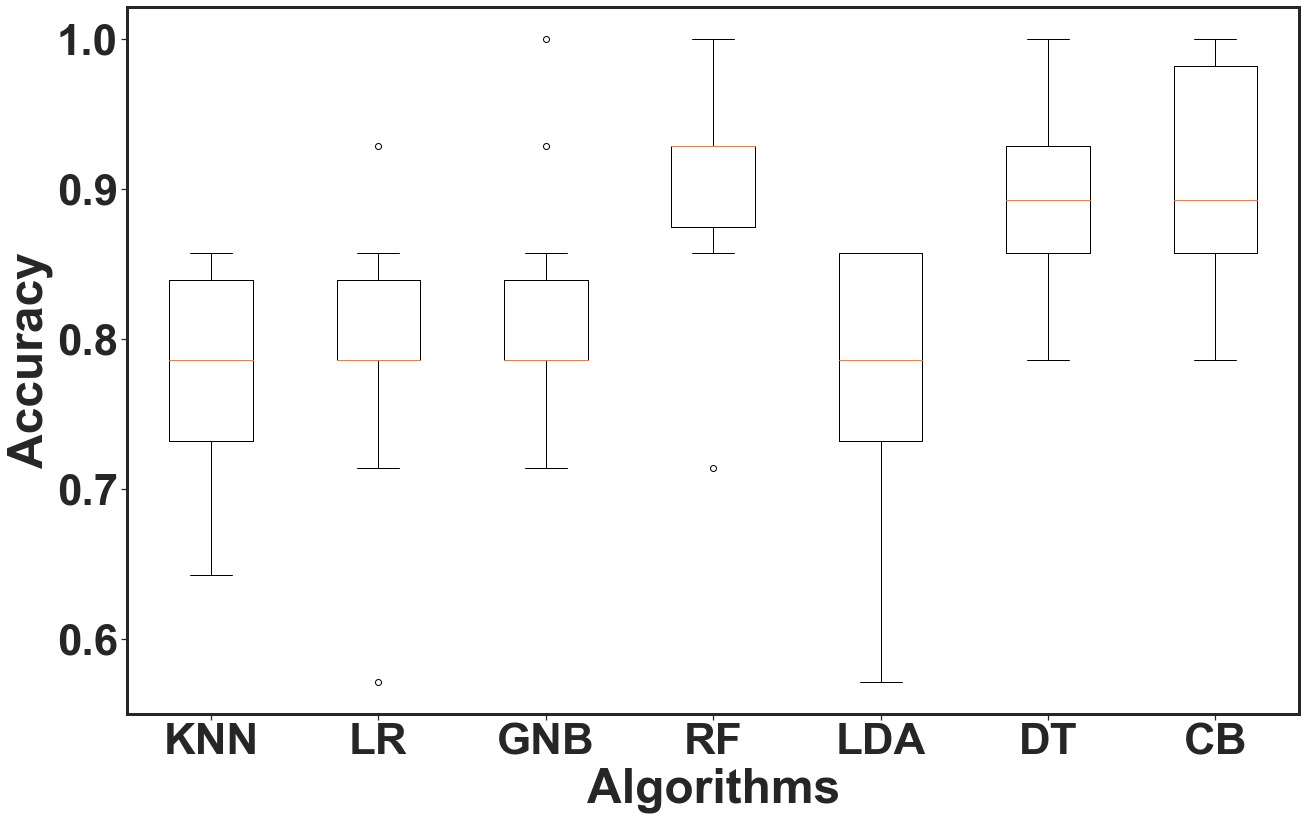

In [129]:

plt.rcParams.update({'font.size': 40})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
rc('axes', linewidth=3)

# Compare Algorithms
plt.rcParams["figure.figsize"] = (21,13)
plt.boxplot(results, labels=names, widths=0.5)
plt.title('')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')

plt.show()

([<matplotlib.axis.XTick at 0x7f92bfe9f810>,
 [Text(0, 0, 'KNN'),
  Text(1, 0, 'LR'),
  Text(2, 0, 'GNB'),
  Text(3, 0, 'RF'),
  Text(4, 0, 'LDA'),
  Text(5, 0, 'DT'),
  Text(6, 0, 'CB')])

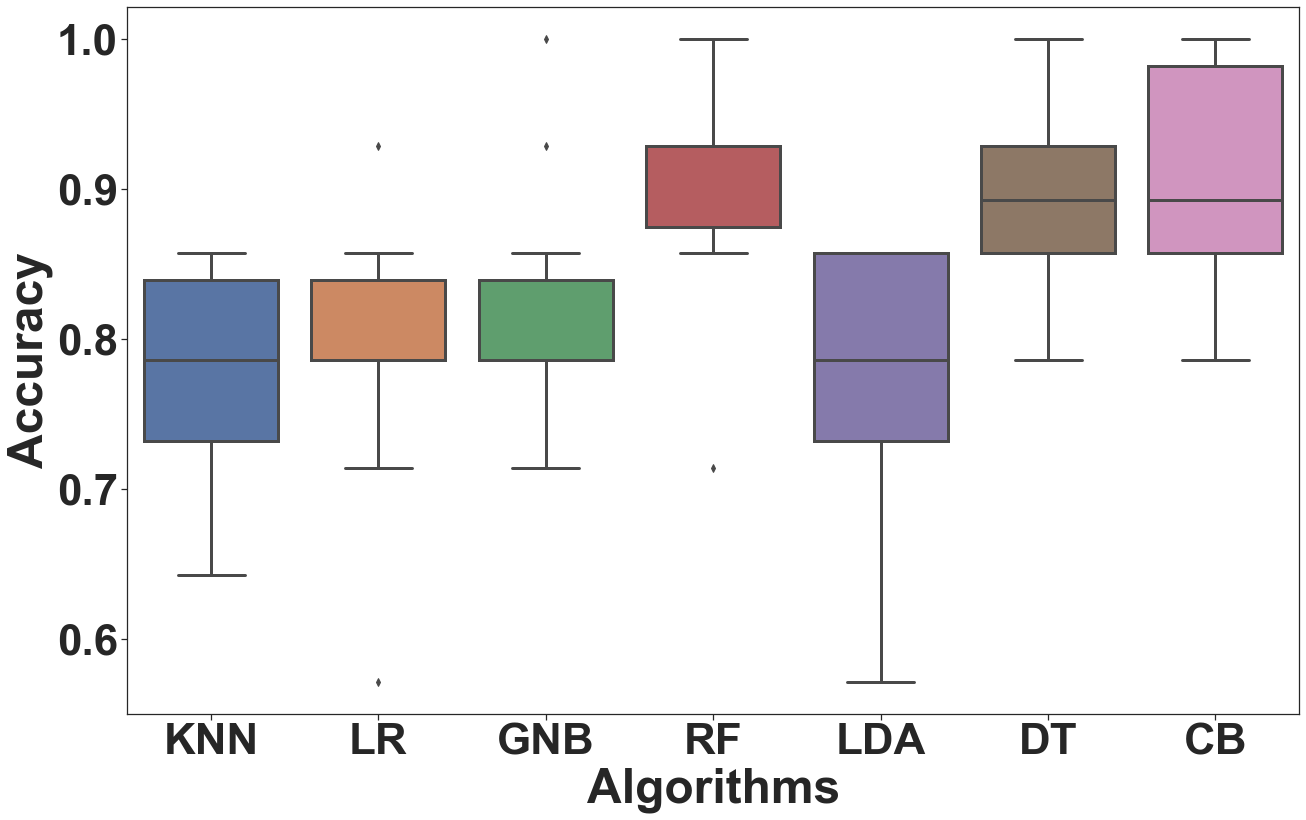

In [132]:
sns.set(style="ticks",font_scale=4, rc={"lines.linewidth": 3})
ax = sns.boxplot(data=results)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')

plt.xticks([0, 1, 2, 3, 4 ,5,6], ['KNN', 'LR', 'GNB','RF', 'LDA', 'DT', 'CB'])